<a href="https://colab.research.google.com/github/Charan1192/IoT/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py", line 119, in _check_targets
    raise TypeError(
TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['P' 'X'] and y_pred=[0]. Make sure that the predictions provided by the classifier coincides with the true labels.

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py", line 113, in _check_targets
    unique_values = np.union1d(y_true, y_pred)
  F

Best hyperparameters: {'algorithm': 'lloyd', 'init': 'k-means++', 'n_clusters': 4, 'n_init': 'warn'}
Accuracy: 0.0


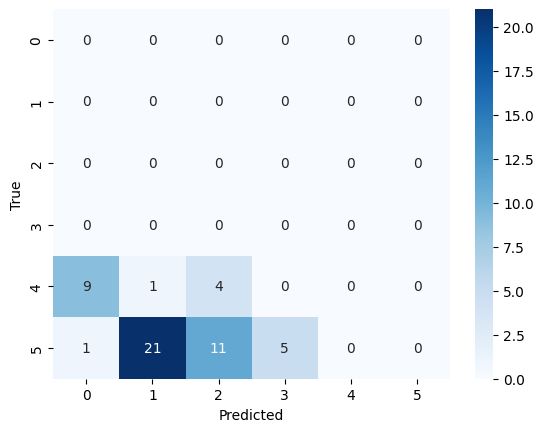

In [ ]:
from scipy.spatial import distance
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('/content/clean.csv')

# Split the data into features and target
X = data.iloc[:, 1:6].values
y = data.iloc[:, 6].values
X = X.astype(np.float32)

# create pipeline with standard scaler and Kmeans
km= KMeans(random_state=4,max_iter=300)

# define hyperparameters to tune
param_grid = {'n_clusters':[1,2,4,8],
              'init':['k-means++','random'], 
              'n_init':['warn','auto'],
              'algorithm':['lloyd', 'elkan','auto']}

# create grid search object
grid_search = GridSearchCV(km, param_grid=param_grid, cv=10, scoring='accuracy',return_train_score=True)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
# fit grid search object to the data
grid_search.fit(X_train, y_train)

# get best estimator
best_estimator = grid_search.best_estimator_

# print best hyperparameters and accuracy
print('Best hyperparameters:', grid_search.best_params_)
print('Accuracy:', grid_search.best_score_)

# use best estimator to make predictions on test set
y_pred = best_estimator.predict(X_test)
# Create a confusion matrix
cm = confusion_matrix(y_test.astype(str), y_pred.astype(str))

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()